# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2021/2022
## Assignment #2 - Empirical Studies & EDA

***
### Group: 
### Names of members: 

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://python3.guide/), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=1769), especially L02 & L03.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, 2 November 2021, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, 10 November 2021, 11:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. 21_RM_A02_Group_A.ipynb
2. 21_RM_A02_Group_A.pdf

***
***

#### Task 1 **[10 points] Data Scales**

1. For each of the features in the CRU dataset, identify all scales of data whose definition is valid for all entries in the columns that belong to that feature. Create a table using python code that contains all features as rows, data scales as columns, and binary table entries indicating whether the feature values (i.e. column entries in the database) correspond to the data scale or not.
2. For each of the features, briefly explain to which of the errors mentioned in the lecture this feature is prone. 

#### Task 2 **[10 points] Types of Experiments**

Different types of studies and experiments were discussed in the lecture. With respect to climate data, state whether it is possible to conduct the following experiments given below. Briefly explain your reasoning and give an example for each of the four types.

1. Exploratory study
2. Assessment study
3. Observation experiments
4. Manipulation experiments


#### Task 3 **[40 points] Visualisation**

Plot the four statistics given below using suitable python packages. Make sure to use appropriate plot types for visualisation (e.g. histogram, bar plot, scatter plot, line plot ...) and proper axis labelling/scaling. Add a legend to each plot to facilitate the viewer's understanding. Make sure to describe/interpret the outcome of your visualisation.

1. Timeline of cumulative precipitation over the course of the year 2020. _(i)_ world-wide and _(ii)_ per country
2. Average precipitation per wetday per country in 2020.
3. Climate diagram based on the average data from the last decade (2011 - 2020) for one country of your choice.<br> _Note: Include the amount of precipitation as well as min, mean and max temperature._
4. Frequency distribution of mean temperatures in Germany in the timespans (i) 1960-1980 and (ii) 2000-2020. <br> _Note: Use appropriate, common bins for both diagrams._

_Hint: It might be helpful to use the "wide__to__long" function in pandas to format the data for plotting!_ <br>

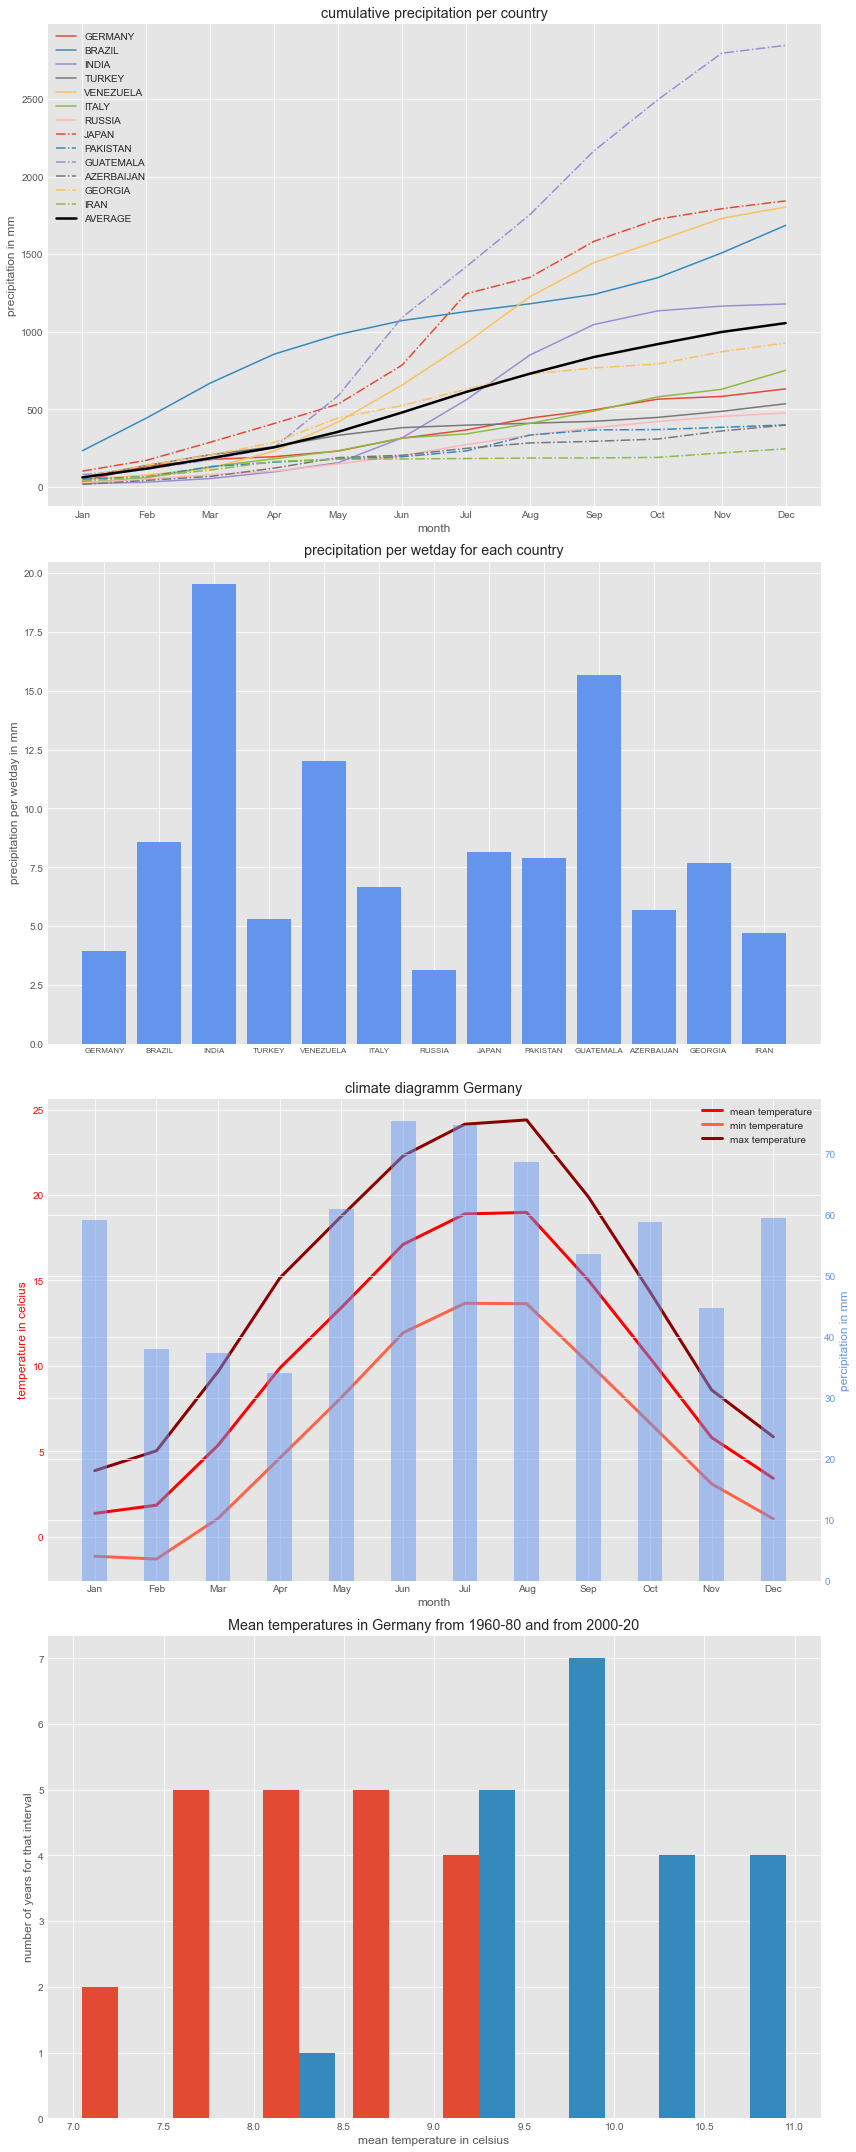

'\n1: In this plot it is visible that Guatemala has the highest total amount of precipitation over the course of \nthe year 2020. The lowest amount of presipitation was measured in Iran. The avergare precipitaion of all countries \nis shown in black.\n2: Each bar shows the average presipitation per wetday for each country. India has the highest average while Russia \nhas the lowest.\n3. Here a climate diagram for Germany is shown. It is visible how Germany has seasonal climate and that it is \nlocated on the northern hemisphere, because the summer months are much warmer than the winter months. The \nprecipitation has its maximum in June and it minimum in April. The hottest month is in average August and the \ncoldest is January.\n4. Here the mean temperatures for Germany are shown in a histogram with a bin size of 0.5 Kelvin. It is visible\nthat the mean temperatures between 1960 and 1980 has been between 7 and 9.5 degrees Celsius, while the majority of all years\nbetween 2000 and 2020

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# reading csv
cru_df = pd.read_csv("Datasets/CRU_data.csv", sep = ';')
cru_df = cru_df.replace(-999,np.nan)
fig, axs = plt.subplots(4, 1, figsize=(12, 30))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#### first task ####

# filtering the dataframe
df_precip_2020 = cru_df.query('YEAR ==2020')[cru_df.columns[66:78]]
countries = cru_df["COUNTRY"].unique()
count_countries = df_precip_2020.shape[0]

# plot adjustments
axs[0].set_title("cumulative precipitation per country") 
axs[0].set_xlabel("month")
axs[0].set_xticks(range(12))
axs[0].set_xticklabels(months)
axs[0].set_ylabel("precipitation in mm")

# plotting each country
for i in range(count_countries):
    precip_list_country = df_precip_2020.iloc[[i]].values.flatten().tolist()
    for j in range(11, -1, -1):
        precip_list_country[j] = sum(precip_list_country[:j+1])
    if i <=6:
        linestyle = "solid"
    else:
        linestyle = "dashdot"
    axs[0].plot(range(12), precip_list_country, label = countries[i], linestyle=linestyle)

# plotting worldwide plot
precip_worldwide = df_precip_2020.mean().values.flatten().tolist()
for j in range(11, -1, -1):
        precip_worldwide[j] = sum(precip_worldwide[:j+1])
axs[0].plot(range(12), precip_worldwide, color="black", label="AVERAGE", linewidth=2.5)
axs[0].legend()

#### second task ####

# filtering the dataframe
df_wetdays_2020 = cru_df.query('YEAR ==2020')[cru_df.columns[50:62]]

# calculation percipitation per wetday
precip_per_wetdays = []
for i in range(count_countries):
    precip_country = sum(df_precip_2020.iloc[[i]].values.flatten().tolist())
    wetdays_country = sum(df_wetdays_2020.iloc[[i]].values.flatten().tolist())
    precip_per_wetdays.append(precip_country / wetdays_country)

# plotting the bar plot
axs[1].set_title("precipitation per wetday for each country") 
axs[1].set_ylabel("precipitation per wetday in mm")
axs[1].tick_params(axis='x', which='major', labelsize=8)
axs[1].bar(countries, height=precip_per_wetdays, color='cornflowerblue')

#### third taks ####

# filtering the dataframe
df_germany_last_decade = cru_df.query('YEAR > 2010 and COUNTRY == "GERMANY"')

# getting all lists to plot
temp = df_germany_last_decade[cru_df.columns[2:14]].mean().values.flatten().tolist()
temp_min = df_germany_last_decade[cru_df.columns[18:30]].mean().values.flatten().tolist()
temp_max = df_germany_last_decade[cru_df.columns[34:46]].mean().values.flatten().tolist()
precip = df_germany_last_decade[cru_df.columns[66:78]].mean().values.flatten().tolist()

# setting up the diagramm
axs[2].set_title("climate diagramm Germany")
axs[2].set_xlabel("month")
axs[2].set_xticks(range(12))
axs[2].set_xticklabels(months)
axs[2].set_ylabel("temperature in celcius", color='red')
axs[2].tick_params(axis='y', labelcolor='red')
axs2_twin = axs[2].twinx()
axs2_twin.set_ylabel("percipitation in mm", color='cornflowerblue')
axs2_twin.tick_params(axis='y', labelcolor='cornflowerblue')

# plotting all data
axs[2].plot(range(12), temp, color='red', label="mean temperature", linewidth=3.0)
axs[2].plot(range(12), temp_min, color='tomato', label="min temperature", linewidth=3.0)
axs[2].plot(range(12), temp_max, color='darkred', label="max temperature", linewidth=3.0)
axs2_twin.bar(range(12), height = precip, width = 0.4, color='cornflowerblue', alpha=0.5)
axs[2].legend()

#### fourth task ####

# setting up data
df_germany_1960_80 = cru_df.query('YEAR >= 1960 and YEAR <= 1980 and COUNTRY == "GERMANY"')[cru_df.columns[2:14]]
df_germany_1960_80_means = df_germany_1960_80.mean(axis=1).values.flatten().tolist()
df_germany_2000_20 = cru_df.query('YEAR >= 2000 and YEAR <= 2020 and COUNTRY == "GERMANY"')[cru_df.columns[2:14]]
df_germany_2000_20_means = df_germany_2000_20.mean(axis=1).values.flatten().tolist()

# plotting the histogram
axs[3].set_title("Mean temperatures in Germany from 1960-80 and from 2000-20")
axs[3].set_xlabel("mean temperature in celsius")
axs[3].set_ylabel("number of years for that interval")
axs[3].hist([df_germany_1960_80_means, df_germany_2000_20_means], bins=8, range=(7,11))


fig.tight_layout()
plt.show()

#### Description ####
'''
1: In this plot it is visible that Guatemala has the highest total amount of precipitation over the course of 
the year 2020. The lowest amount of presipitation was measured in Iran. The avergare precipitaion of all countries 
is shown in black.
2: Each bar shows the average presipitation per wetday for each country. India has the highest average while Russia 
has the lowest.
3. Here a climate diagram for Germany is shown. It is visible how Germany has seasonal climate and that it is 
located on the northern hemisphere, because the summer months are much warmer than the winter months. The 
precipitation has its maximum in June and it minimum in April. The hottest month is in average August and the 
coldest is January.
4. Here the mean temperatures for Germany are shown in a histogram with a bin size of 0.5 Kelvin. It is visible
that the mean temperatures between 1960 and 1980 has been between 7 and 9.5 degrees Celsius, while the majority of all years
between 2000 and 2020 have been warmer. Yearly averages of up to 11 degrees Celsius have been measured.
'''


#### Task 4 **[40 points] EDA**

Following the Titanic example from the lecture, we want to gain first insights into multivariate EDA. We want to see if the climate warming is different between countries. For this purpose, take the following steps using python to answer the question **whether the number of warmer/colder months (compared to 50 years ago) changes between countries and whether there is a difference between decades.**

For this task use the data from Georgia and Guatemala starting from the year 1961. 

1. For each month, calculate if it was warmer or colder compared to the same month 50 years ago.
2. Create two contingency tables of **total number of warmer and colder months per country** (one containing the absolute counts and the second one containing row and column proportions).
3. Create another two contingency tables of **total number of warmer and colder months per decade** (one containing the absolute counts and the second one containing row and column proportions).
4. Plot a histogram or bar chart that shows the **total number of warmer months by country and decade**. _Hint: The usage of different colors might help a lot!_
5. Now combine the contingency tables of task 4.2 and 4.3 (see Titanic example discussed in the EDA lecture), so that you have a subdivision into countries by decade, with absolute counts and row/column proportions.
6. Calculate the expected frequencies $f_e$ for each conjunct event in the contingency table from task 4.5 and create a copy of the table from task 4.5 containing the $f_e$ values.
7. Calculate $\chi²_{Georgia}$ and $\chi²_{Guatemala}$ and interpret.
8. What does a small $\chi²$ value mean? What if it's zero? Explain.